In [8]:
import pandas as pd
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Seasonal
df1 = pd.read_csv('./datasets/airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freq = 'MS'

In [4]:
# Non-seasonal
df2 = pd.read_csv('./datasets/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D'

<AxesSubplot:xlabel='Month'>

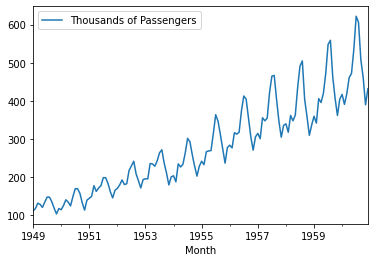

In [5]:
df1.plot()

In [6]:
from statsmodels.tsa.stattools import adfuller

In [9]:
adfuller(df1['Thousands of Passengers'])

(0.8153688792060433,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [15]:
dftest = adfuller(df1['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4], index=['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations'])

In [16]:
dfout

ADF Test Statistic      0.815369
p-value                 0.991880
# Lags Used            13.000000
# Observations        130.000000
dtype: float64

In [17]:
for key, val in dftest[4].items():
    dfout[f'critical value ({key})'] = val

In [14]:
dfout

ADF Test Statistic        0.815369
p-value                   0.991880
# Lags Used              13.000000
# Observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64

In [18]:
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations']
    out = pd.Series(result[0:4], index=labels)
    
    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis')
        print('Reject the null hypothesis')
        print('Data has no unit root and is stationary')
        
    else:
        print('Weak evidence against the null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non-stationary')

In [19]:
adf_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF Test Statistic        0.815369
p-value                   0.991880
# Lags Used              13.000000
# Observations          130.000000
Critical Value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


<AxesSubplot:xlabel='Month'>

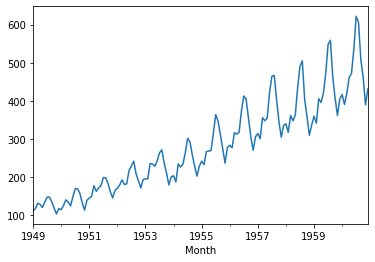

In [20]:
df1['Thousands of Passengers'].plot()

In [21]:
adf_test(df2['Births'])

Augmented Dickey-Fuller Test: 
ADF Test Statistic     -1.523943e+01
p-value                 5.187572e-28
# Lags Used             0.000000e+00
# Observations          3.640000e+02
Critical Value (10%)   -2.571018e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

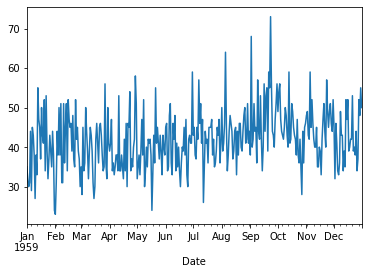

In [22]:
df2['Births'].plot()

In [23]:
df3 = pd.read_csv('./datasets/samples.csv', index_col=0, parse_dates=True)
df3.index.freq = 'MS'
df3

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62
...,...,...,...,...
1959-08-01,49,73,9338,58
1959-09-01,41,77,9502,38
1959-10-01,64,70,9667,42
1959-11-01,37,87,9833,62


<AxesSubplot:>

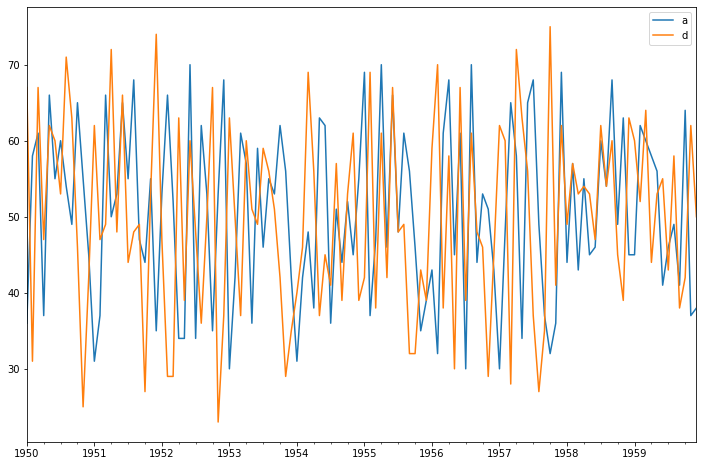

In [24]:
df3[['a', 'd']].plot(figsize=(12, 8))

<AxesSubplot:>

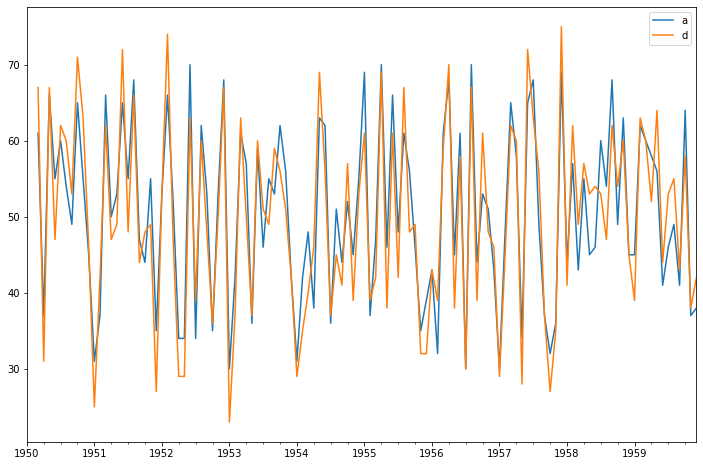

In [26]:
df3['a'].iloc[2:].plot(figsize=(12, 8), legend=True)
df3['d'].shift(2).plot(legend=True)

In [28]:
from statsmodels.tsa.stattools import grangercausalitytests

In [32]:
grangercausalitytests(df3[['a', 'd']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [33]:
grangercausalitytests(df3[['b', 'd']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


In [34]:
np.random.seed(42)

df = pd.DataFrame(np.random.randint(20, 30, (50, 2)), columns=['test', 'predictions'])

In [35]:
df.head()

,test,predictions
0,26,23
1,27,24
2,26,29
3,22,26
4,27,24


<AxesSubplot:>

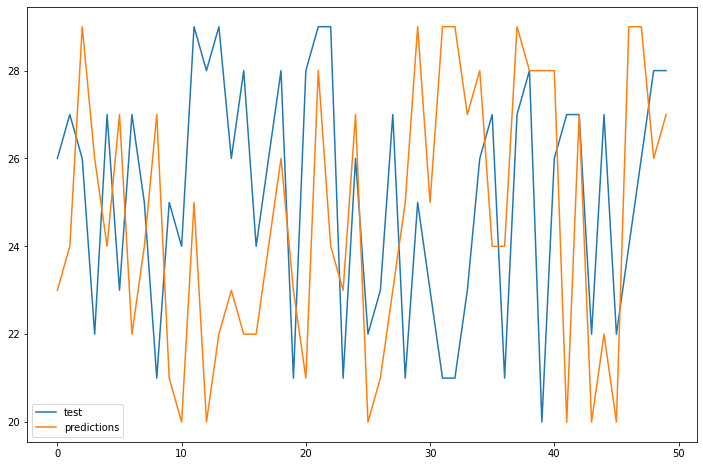

In [36]:
df.plot(figsize=(12, 8))

In [37]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs

In [41]:
rmse(df['test'], df['predictions'])

4.125530268947253

In [42]:
df = pd.read_csv('./datasets/airline_passengers.csv', index_col='Month', parse_dates=True)
df.index.freq = 'MS'

<AxesSubplot:xlabel='Month'>

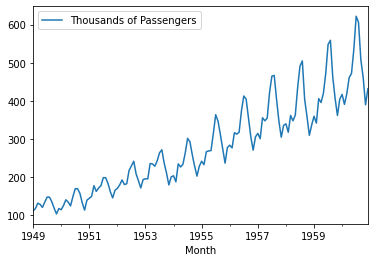

In [43]:
df.plot()

In [44]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

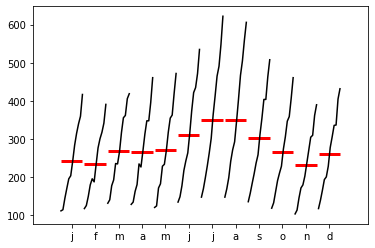

In [46]:
month_plot(df['Thousands of Passengers']);

In [47]:
dfq = df['Thousands of Passengers'].resample(rule='Q').mean()

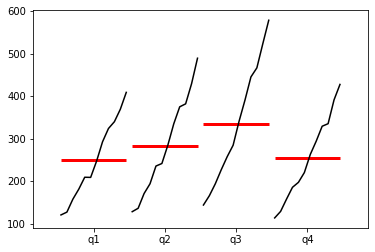

In [49]:
quarter_plot(dfq);